In [11]:
import pandas as pd

In [12]:
# train_df = pd.read_csv("data/click/train.csv", nrows=100000)
# test_df = pd.read_csv("data/click/train.csv", header=0, skiprows=(1, 100000), nrows=100000)

In [13]:
# unused_columns, label_column = ["id", "hour", "device_id", "device_ip"], "click"
# train_df = train_df.drop(unused_columns, axis=1)
# y_train = train_df[label_column]
# test_df = test_df.drop(unused_columns, axis=1)
# y_test = test_df[label_column]

In [14]:
# from sklearn.feature_extraction import DictVectorizer

In [15]:
# X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
# X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())
# vectorizer = DictVectorizer(sparse=True)
# X_train = vectorizer.fit_transform(X_dict_train)
# X_test = vectorizer.fit_transform(X_dict_test)

In [16]:
X_train, y_train, X_test, y_test = pd.read_pickle('data/click/click.pkl')

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
params = {"max_depth": [3, 10, None]}
random_forest = RandomForestClassifier(n_estimators=100, criterion="gini", \
                                       min_samples_split=30, n_jobs=-1)
grid_search = GridSearchCV(random_forest, params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)
best = grid_search.best_params_
print(best)
random_forest_best = grid_search.best_estimator_
y_pred = random_forest_best.predict(X_test)

{'max_depth': None}


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [20]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(accuracy, confusion_matrix)
y_pred_proba = random_forest_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

0.85153 [[81355  1155]
 [13692  3798]]


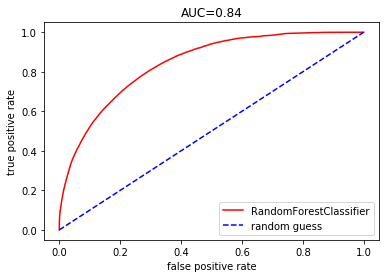

In [25]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, "r-", label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");
plt.show()

In [22]:
params = {"max_depth": [3, 10, None],
          "n_estimators":[100, 200, 500],
         "min_samples_split":[10, 30, 50]}
random_forest = RandomForestClassifier(criterion="gini", n_jobs=-1)
grid_search = GridSearchCV(random_forest, params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)
best = grid_search.best_params_
print(best)
random_forest_best = grid_search.best_estimator_
y_pred = random_forest_best.predict(X_test)

{'max_depth': None, 'min_samples_split': 50, 'n_estimators': 500}


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(accuracy, confusion_matrix)
y_pred_proba = random_forest_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

0.84826 [[81377  1133]
 [14041  3449]]


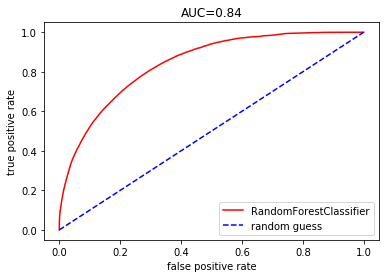

In [24]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, "r-", label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");
plt.show()